## **Project : Estimation of Energy Usage by Accelerometric Analysis Methodology**

*Our study proposes an approach: precisely characterising the energy usage of different exercises using an AX3 accelerometer, we will dissect the biomechanical characteristics of three emblematic exercises: boxing, running and jumping jacks.* 

### 1. Data collection and pre-processing

##### **Packages**


In [ ]:
pip ???

##### **Reading data**

In [40]:
import pandas as pd

filename1 = "../data/running_DATA.resampled.csv"
filename2 = "../data/boxe_DATA.resampled.csv"
filename3 = "../data/jump_DATA.resampled.csv"

acc_run = pd.read_csv(filename1, sep=",") # running accelerometrer data
acc_box = pd.read_csv(filename2, sep=",") # boxing accelerometrer data
acc_jump = pd.read_csv(filename3, sep=",") # jumping jacks accelerometrer data


In [41]:
print(acc_run)
print(acc_box)
print(acc_jump)

                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 22:30:00.000     0.000000      0.000000      0.000000
1      2024-11-26 22:30:00.009     0.000000      0.000000      0.000000
2      2024-11-26 22:30:00.019     0.000000      0.000000      0.000000
3      2024-11-26 22:30:00.029     0.000000      0.000000      0.000000
4      2024-11-26 22:30:00.039     0.000000      0.000000      0.000000
...                        ...          ...           ...           ...
89995  2024-11-26 22:44:59.950    -0.972168      0.244141     -0.270264
89996  2024-11-26 22:44:59.960    -0.890381      0.205566     -0.285400
89997  2024-11-26 22:44:59.970    -0.821777      0.171387     -0.274170
89998  2024-11-26 22:44:59.980    -0.779785      0.126221     -0.239502
89999  2024-11-26 22:44:59.990    -0.734131      0.102295     -0.205078

[90000 rows x 4 columns]
                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 23:23:00.000     0.0

##### **Plot data**

<Axes: >

<Figure size 1900x600 with 0 Axes>

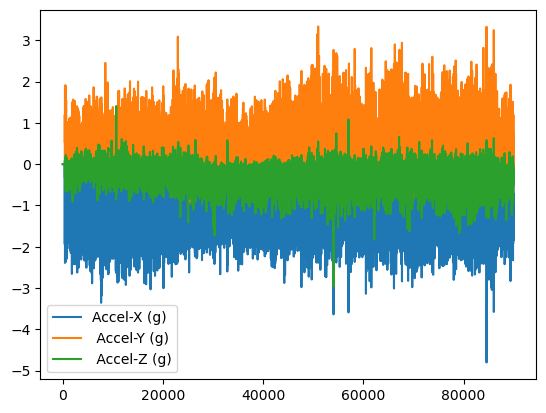

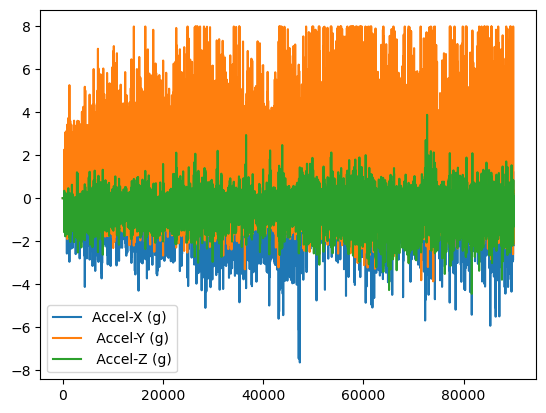

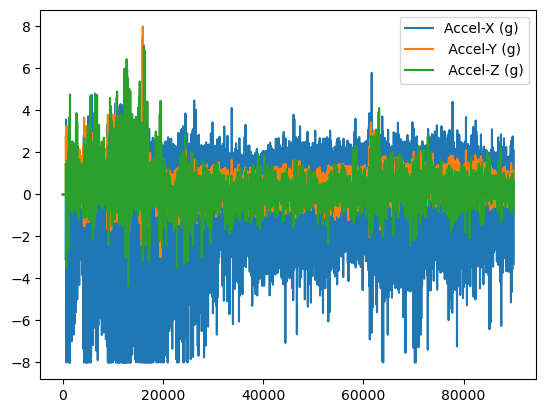

In [50]:
import matplotlib.pyplot as plt # for plotting and graphing data

plt.figure(figsize=(19,6))

acc_run.plot()
acc_box.plot()
acc_jump.plot()

##### **Scaling**

In [51]:
def scaling (acc_data): 
    acc_data.columns = ['Time', 'Accel-X (g)', 'Accel-Y (g)','Accel-Z (g)']
    acc_ = acc_data.drop('Time', axis=1)
    acc_time = acc_data[['Time']]
    acc_x = acc_data[['Accel-X (g)']]
    acc_y = acc_data[['Accel-Y (g)']]
    acc_z = acc_data[['Accel-Z (g)']]
    
    return acc_time,acc_,acc_x,acc_y,acc_z


In [52]:
# Scaling function
acc_time,Acc_run,Acc_x,Acc_y,Acc_z=scaling(acc_run)
acc_time,Acc_box,Acc_x,Acc_y,Acc_z=scaling(acc_box)
acc_time,Acc_jump,Acc_x,Acc_y,Acc_z=scaling(acc_jump)

In [53]:
import numpy as np
np.shape(acc_run)

(90000, 4)

In [54]:
import numpy as np
duration = 90000 / 100  # échantillonné à 100 
print(duration)
time = np.linspace(0, duration, 90000)
print(time)

900.0
[0.00000000e+00 1.00001111e-02 2.00002222e-02 ... 8.99980000e+02
 8.99990000e+02 9.00000000e+02]


### 2. Visualisation and analysis

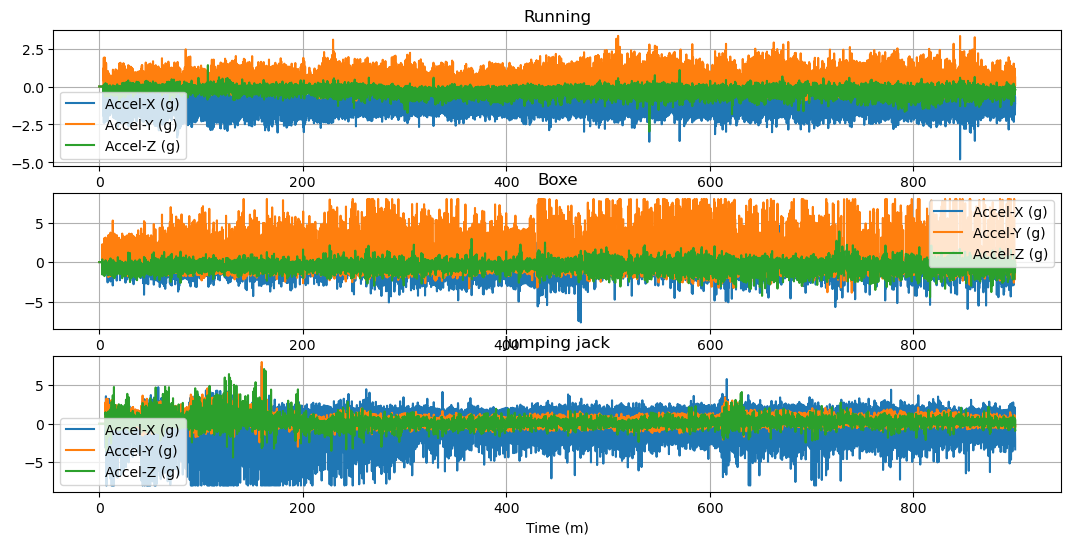

In [58]:
import matplotlib.pyplot as plt # pour tracer et visualiser les données sous forme de graphiques

plt.figure(figsize=(15,6))

plt.subplot(3,1,1)

plt.plot(time,Acc_run)
plt.xlabel('Time (m)') 
plt.ylabel('') 
plt.title('Running')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,2)

plt.plot(time,Acc_box)
plt.xlabel('Time (m)') 
plt.ylabel('') 
plt.title('Boxe')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,3)

plt.plot(time,Acc_jump)
plt.xlabel('Time (m)') 
plt.ylabel('') 
plt.title('Jumping jack')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

##### **ENMO « Euclidian Norm Minus One »**

√(x² + y² + z²) − 1 (avec 1 valeur de gravité)

https://www.sciencedirect.com/science/article/pii/S0398762018314858

In [59]:
def ENMO (acc_data):
    acc_data['ENMO'] = np.sqrt(acc_data['Accel-X (g)']**2 + acc_data['Accel-Y (g)']**2 + acc_data['Accel-Z (g)']**2) - 1  # formula
    acc_data['ENMO'] = acc_data['ENMO'].clip(lower=0)  # data normalisation 
    ENMO=acc_data[['ENMO']]
    return ENMO

In [ ]:
# ENMO function
ENMO_run=scaling(Acc_run)
ENMO_box=scaling(Acc_box)
ENMO_jump=scaling(Acc_jump)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(19,6))

plt.plot(time, ENMO, label='ENMO')
plt.xlabel('Time')
plt.ylabel('ENMO')
plt.title('Titre')
plt.legend()
plt.grid()
plt.show()

##### **Integration over EPOCH**

##### **Count of duration in each intensity level /Filter**

##### **Filter**

### 3. Estimated energy costs